In [1]:
import pymongo as pmg
import pandas as pd
import datetime as dt
import pymysql
import matplotlib.pyplot as plt
from matplotlib.lines import TICKLEFT, TICKRIGHT, Line2D
from matplotlib.patches import Rectangle
import matplotlib as mpl
import matplotlib.dates as mdate
from datetime import time
from KRData.HKData import HKFuture
import configparser
import talib as tb

In [2]:
df1=pd.read_pickle("pkl/hsi.pkl")
df1.head()

datetime     code     open     high      low  \
datetime                                                                      
2014-01-02 09:15:00 2014-01-02 09:15:00  HSI1401  23414.0  23416.0  23370.0   
2014-01-02 09:16:00 2014-01-02 09:16:00  HSI1401  23376.0  23394.0  23360.0   
2014-01-02 09:17:00 2014-01-02 09:17:00  HSI1401  23395.0  23444.0  23391.0   
2014-01-02 09:18:00 2014-01-02 09:18:00  HSI1401  23432.0  23435.0  23419.0   
2014-01-02 09:19:00 2014-01-02 09:19:00  HSI1401  23426.0  23426.0  23390.0   

                       close  MACD  MACD1  MACD2  MA30  MA60   CHG  STD60  \
datetime                                                                    
2014-01-02 09:15:00  23376.0   NaN    NaN    NaN   NaN   NaN -38.0    NaN   
2014-01-02 09:16:00  23394.0   NaN    NaN    NaN   NaN   NaN  18.0    NaN   
2014-01-02 09:17:00  23431.0   NaN    NaN    NaN   NaN   NaN  36.0    NaN   
2014-01-02 09:18:00  23423.0   NaN    NaN    NaN   NaN   NaN  -9.0    NaN   
2014-01-02 09:19:00  23401.0   NaN    NaN    NaN   NaN   NaN -25.0    NaN   

                     STD1  DIFF  DEA  
datetime                              
2014-01-02 09:15:00   NaN   NaN  NaN  
2014-01-02 09:16:00   NaN   NaN  NaN  
2014-01-02 09:17:00   NaN   NaN  NaN  
2014-01-02 09:18:00   NaN   NaN  NaN  
2014-01-02 09:19:00   NaN   NaN  NaN

In [4]:
time1=dt.time(9,15,0)
time2=dt.time(16,30,0)


datetime     code     open     high      low  \
datetime                                                                      
2019-01-03 00:00:00 2019-01-03 00:00:00  HSI1901  25256.0  25266.0  25243.0   
2019-01-03 00:01:00 2019-01-03 00:01:00  HSI1901  25247.0  25252.0  25242.0   
2019-01-03 00:02:00 2019-01-03 00:02:00  HSI1901  25241.0  25249.0  25239.0   
2019-01-03 00:03:00 2019-01-03 00:03:00  HSI1901  25251.0  25256.0  25246.0   
2019-01-03 00:04:00 2019-01-03 00:04:00  HSI1901  25251.0  25260.0  25251.0   
2019-01-03 00:05:00 2019-01-03 00:05:00  HSI1901  25261.0  25280.0  25261.0   
2019-01-03 00:06:00 2019-01-03 00:06:00  HSI1901  25280.0  25298.0  25269.0   
2019-01-03 00:07:00 2019-01-03 00:07:00  HSI1901  25298.0  25302.0  25289.0   
2019-01-03 00:08:00 2019-01-03 00:08:00  HSI1901  25294.0  25308.0  25293.0   
2019-01-03 00:09:00 2019-01-03 00:09:00  HSI1901  25308.0  25312.0  25300.0   
2019-01-03 00:10:00 2019-01-03 00:10:00  HSI1901  25303.0  25305.0  25298.0   
2019-01-03 00:11:00 2019-01-03 00:11:00  HSI1901  25299.0  25312.0  25299.0   
2019-01-03 00:12:00 2019-01-03 00:12:00  HSI1901  25303.0  25314.0  25299.0   
2019-01-03 00:13:00 2019-01-03 00:13:00  HSI1901  25314.0  25320.0  25311.0   
2019-01-03 00:14:00 2019-01-03 00:14:00  HSI1901  25315.0  25316.0  25306.0   
2019-01-03 00:15:00 2019-01-03 00:15:00  HSI1901  25317.0  25329.0  25303.0   
2019-01-03 00:16:00 2019-01-03 00:16:00  HSI1901  25307.0  25311.0  25303.0   
2019-01-03 00:17:00 2019-01-03 00:17:00  HSI1901  25309.0  25310.0  25301.0   
2019-01-03 00:18:00 2019-01-03 00:18:00  HSI1901  25302.0  25306.0  25296.0   
2019-01-03 00:19:00 2019-01-03 00:19:00  HSI1901  25298.0  25334.0  25296.0   
2019-01-03 00:20:00 2019-01-03 00:20:00  HSI1901  25330.0  25342.0  25321.0   
2019-01-03 00:21:00 2019-01-03 00:21:00  HSI1901  25322.0  25328.0  25310.0   
2019-01-03 00:22:00 2019-01-03 00:22:00  HSI1901  25313.0  25317.0  25302.0   
2019-01-03 00:23:00 2019-01-03 00:23:00  HSI1901  25303.0  25315.0  25303.0   
2019-01-03 00:24:00 2019-01-03 00:24:00  HSI1901  25311.0  25321.0  25308.0   
2019-01-03 00:25:00 2019-01-03 00:25:00  HSI1901  25319.0  25320.0  25307.0   
2019-01-03 00:26:00 2019-01-03 00:26:00  HSI1901  25308.0  25324.0  25308.0   
2019-01-03 00:27:00 2019-01-03 00:27:00  HSI1901  25314.0  25314.0  25295.0   
2019-01-03 00:28:00 2019-01-03 00:28:00  HSI1901  25295.0  25299.0  25280.0   
2019-01-03 00:29:00 2019-01-03 00:29:00  HSI1901  25283.0  25286.0  25280.0   
...                                 ...      ...      ...      ...      ...   
2019-01-03 23:30:00 2019-01-03 23:30:00  HSI1901  25069.0  25069.0  25054.0   
2019-01-03 23:31:00 2019-01-03 23:31:00  HSI1901  25057.0  25057.0  25044.0   
2019-01-03 23:32:00 2019-01-03 23:32:00  HSI1901  25049.0  25062.0  25045.0   
2019-01-03 23:33:00 2019-01-03 23:33:00  HSI1901  25048.0  25048.0  25036.0   
2019-01-03 23:34:00 2019-01-03 23:34:00  HSI1901  25045.0  25056.0  25044.0   
2019-01-03 23:35:00 2019-01-03 23:35:00  HSI1901  25051.0  25054.0  25047.0   
2019-01-03 23:36:00 2019-01-03 23:36:00  HSI1901  25048.0  25052.0  25032.0   
2019-01-03 23:37:00 2019-01-03 23:37:00  HSI1901  25043.0  25043.0  25021.0   
2019-01-03 23:38:00 2019-01-03 23:38:00  HSI1901  25029.0  25033.0  25019.0   
2019-01-03 23:39:00 2019-01-03 23:39:00  HSI1901  25019.0  25033.0  25015.0   
2019-01-03 23:40:00 2019-01-03 23:40:00  HSI1901  25030.0  25042.0  25024.0   
2019-01-03 23:41:00 2019-01-03 23:41:00  HSI1901  25032.0  25034.0  25026.0   
2019-01-03 23:42:00 2019-01-03 23:42:00  HSI1901  25030.0  25040.0  25027.0   
2019-01-03 23:43:00 2019-01-03 23:43:00  HSI1901  25034.0  25036.0  25021.0   
2019-01-03 23:44:00 2019-01-03 23:44:00  HSI1901  25022.0  25022.0  25005.0   
2019-01-03 23:45:00 2019-01-03 23:45:00  HSI1901  25014.0  25022.0  25014.0   
2019-01-03 23:46:00 2019-01-03 23:46:00  HSI1901  25023.0  25039.0  25022.0   
2019-01-03 23:47:00 2019-01-03 23:47:00  HSI1901  25040.0  25041.0  25029.0   
20

In [22]:
def CalcMa60(date):
    time1=dt.time(9,15,0)
    time2=dt.time(16,30,0)
#     date='2019-01-03'
    f1=df1[str(date)]
    cont1=(f1.index.time>=time1)&(f1.index.time<=time2)
    res=[]
    rec={}
    state=0
    cont={}
    cnt=0
    no=0
    for i,row in f1[cont1].iterrows():
        cont['over']=row['close']>row['MA60'] and state in[0,2]
        cont['under']=row['close']<row['MA60'] and state in[0,1]
        cnt+=1
        if cont['over']:
            if state==2:
                rec['close']=row['close']
                rec['diff']=rec['open']-rec['close']
                rec['cnt']=cnt
                cnt=0
                rec['no']=no
                no+=1
                state=3
                #             print(rec)
                res.append(rec)
                rec={}
            state=1
            rec['begin']=i
            rec['open']=row['close']
            rec['state']=1
        elif cont['under'] :
            if state==1:
                rec['close']=row['close']
                rec['diff']=rec['open']-rec['close']
                rec['cnt']=cnt
                cnt=0
                rec['no']=no
                no+=1
                sate=4
    #             print(rec)
                res.append(rec)
                rec={}
            state=2
            rec['begin']=i
            rec['open']=row['close']
            rec['state']=2
    if state==1:
        rec['close']=row['close']
        rec['diff']=rec['open']-rec['close']
        rec['cnt']=cnt
        rec['no']=no
        res.append(rec)
    #     print(rec)
    elif state==2:
        rec['close']=row['close']
        rec['diff']=rec['open']-rec['close']
        rec['cnt']=cnt
        rec['no']=no
        res.append(rec)
    return res
#     print(rec)

In [23]:
dList=df1.datetime.dt.date.unique()
Result=[]
for dd in dList:
#     print(dd)
    res=CalcMa60(dd)
    for a in res:
        Result.append(a)
print("OK")

OK


In [27]:
Calc=['sum','count','mean','max','min','std']
R1=pd.DataFrame(Result)

R1['Date']=R1.begin.apply(lambda x:x.date())
R1.groupby(['state','no'])['diff'].agg(Calc)
R1[R1.state==2].groupby(['state','no'])['diff'].agg(Calc)
# R2.sort_values('sum')
# R1[(R1.state==1)&(R1.no==0)].sort_values('diff',ascending=False)
# R1['diff'].agg(Calc)

sum  count       mean     max    min        std
state no                                                    
2     0   -128.0    599  -0.213689   596.0 -305.0  97.212733
      1   2839.0    691   4.108538  1056.0 -122.0  74.060970
      2   1323.0    599   2.208681   634.0  -71.0  52.757299
      3   -470.0    691  -0.680174   384.0  -67.0  43.883117
      4    808.0    599   1.348915   998.0  -67.0  56.941178
      5  -1458.0    690  -2.113043   267.0  -73.0  33.579600
      6   -204.0    599  -0.340568   514.0 -127.0  39.902652
      7    686.0    686   1.000000   583.0  -56.0  43.282977
      8   -872.0    596  -1.463087   219.0  -81.0  28.514722
      9  -1560.0    678  -2.300885   501.0  -56.0  31.015520
      10   -73.0    590  -0.123729   327.0  -60.0  31.677009
      11   268.0    663   0.404223   538.0  -70.0  36.298479
      12  -572.0    581  -0.984509   404.0  -60.0  30.930313
      13  -129.0    651  -0.198157   254.0  -66.0  27.751907
      14  -999.0    571  -1.749562   364.0  -80.0  25.787838
      15  -169.0    632  -0.267405   418.0  -73.0  32.479856
      16  -198.0    540  -0.366667   285.0  -69.0  29.619335
      17  -412.0    606  -0.679868   525.0  -51.0  32.613182
      18 -1323.0    516  -2.563953   143.0  -48.0  19.962921
      19 -1015.0    575  -1.765217   260.0  -48.0  24.211010
      20  -747.0    483  -1.546584   294.0  -50.0  23.229225
      21  -266.0    526  -0.505703   239.0  -51.0  27.021102
      22   -41.0    445  -0.092135   440.0  -49.0  30.366204
      23 -1107.0    497  -2.227364   195.0  -59.0  20.629572
      24   499.0    406   1.229064   348.0  -62.0  32.332825
      25   -88.0    442  -0.199095   794.0  -60.0  43.599769
      26   461.0    364   1.266484   168.0  -34.0  25.541580
      27  1403.0    394   3.560914   713.0  -29.0  47.262330
      28    86.0    307   0.280130   145.0  -49.0  23.906538
      29   384.0    340   1.129412   249.0  -68.0  28.841767
...          ...    ...        ...     ...    ...        ...
      32   306.0    229   1.336245   461.0  -57.0  36.404231
      33   297.0    246   1.207317   205.0  -36.0  28.003238
      34    52.0    190   0.273684   245.0  -35.0  26.605065
      35   165.0    203   0.812808   166.0  -32.0  24.617559
      36   194.0    148   1.310811   181.0  -24.0  24.790510
      37  -138.0    161  -0.857143   140.0  -37.0  18.475950
      38    36.0    119   0.302521    97.0  -34.0  20.370948
      39   -13.0    116  -0.112069   141.0  -21.0  20.437719
      40   -31.0     92  -0.336957   106.0  -24.0  18.837231
      41  -130.0     88  -1.477273    89.0  -18.0  15.083657
      42   360.0     73   4.931507   133.0  -17.0  31.454256
      43   362.0     62   5.838710   308.0  -24.0  49.872360
      44   -60.0     54  -1.111111    69.0  -18.0  14.856123
      45   -37.0     48  -0.770833    67.0  -30.0  16.697865
      46    62.0     43   1.441860    75.0  -14.0  18.442062
      47  -176.0     38  -4.631579    16.0  -26.0   6.968737
      48   125.0     32   3.906250   194.0  -12.0  35.809856
      49    77.0     23   3.347826   106.0  -16.0  24.638493
      50   -77.0     18  -4.277778    10.0  -15.0   5.633989
      51   -15.0     11  -1.363636     5.0   -9.0   4.105429
      52   -74.0     14  -5.285714     3.0  -20.0   5.497252
      53    19.0      4   4.750000    36.0  -11.0  21.171915
      54    -2.0      8  -0.250000    25.0   -7.0  10.319884
      55    -7.0      2  -3.500000    -3.0   -4.0   0.707107
      56     0.0      4   0.000000     3.0   -4.0   3.559026
      57    -2.0      1  -2.000000    -2.0   -2.0        NaN
      58    46.0      2  23.000000    37.0    9.0  19.798990
      59    -5.0      1  -5.000000    -5.0   -5.0        NaN
      61    -1.0      1  -1.000000    -1.0   -1.0        NaN
      63     6.0      1   6.000000     6.0    6.0        NaN

[62 rows x 6 columns]

In [93]:
def TradeDay(Date):
#     Date='2014-01-03'
    F2=df1[str(Date)]

    #记录结果
    Dict_MACD={}
    Dict_MA60={}
    Dict_Trade={}
    Res={}
    Res['MACD']=[]
    Res['MA60']=[]
    Res['Trade']=[]
    #Begin Macd State
    Dict_MACD['StateB']=0
    #End MACD State
    Dict_MACD['StateE']=0
    Dict_MA60['State']=0
    #常用参数
    Para={}
    Para['Macd_Index']=0
    Para['Ma60_Index']=0
    Para['Macd_CNT1']=0
    Para['Macd_CNT2']=0
    Para['T1']=dt.time(9,15,0)
    Para['T2']=dt.time(16,30,0)
    Para['Index']=0
    Para['Trade_State']=0
    Ref=(F2.index.time>=Para['T1']) & (F2.index.time<=Para['T2'])
    #判断的条件
    Cont={}
    for i,row in F2[Ref].iterrows():
        #State MACD RED 1:>ma60,2:<ma6 |MACD Geen 3:>ma60,4:<ma60
        #持续MACD红区Red
        Cont['Macd_R']=row["MACD"]>0 and Dict_MACD['StateB'] in [1,2]
        #持续MACD绿区Green
        Cont['Macd_G']=row['MACD']<0 and Dict_MACD['StateB'] in [3,4]
        #to_MACD红区Red
        Cont['Macd_2R']=row['MACD']>0 and Dict_MACD['StateB'] in [0,3,4]
        #to_MACD_Green
        Cont['Macd_2G']=row['MACD']<0 and Dict_MACD['StateB'] in [0,1,2]

        #Over ma60
        Cont['Ma60_O']=row["close"]>row['MA60'] and Dict_MA60['State']==1
        #Under Ma60
        Cont['Ma60_U']=row['close']<row['MA60'] and Dict_MA60['State']==-1
        #TO Ma60 Over
        Cont['Ma60_2O']=row['close']>=row['MA60'] and Dict_MA60['State']<=0
        #To Ma60 Under
        Cont['Ma60_2U']=row['close']<row['MA60'] and Dict_MA60['State']>=0

        #calc ma60
        if Cont['Ma60_2O'] or Cont['Ma60_2U']:
            #Ma60上下转换
            if Dict_MA60['State'] in[1,-1]:
                Dict_MA60['Close']=row['MA60']
                Dict_MA60['End']=i.time()
                Dict_MA60['Diff']=Dict_MA60['Close']-Dict_MA60['Open']
                Res['MA60'].append(Dict_MA60)
                Dict_MA60={}
            Dict_MA60['No']=Para['Ma60_Index']
            Dict_MA60['Date']=i.date()
            Dict_MA60['Begin']=i.time()
            Dict_MA60['Open']=row['close']
            Dict_MA60['High']=row['close']
            Dict_MA60['Low']=row['close']
            Dict_MA60['Count']=1
            Dict_MA60['Std1']=1 if row['STD1']>=1.5 else 0
            Dict_MA60['Std2']=1 if row['STD1']<=-1.5 else 0
            Dict_MA60['State']=1 if Cont['Ma60_2O'] else -1
            Para['Ma60_Index']+=1
            Para['Macd_CNT1']=0
            Para['Macd_CNT2']=0
        elif Cont['Ma60_O'] or Cont['Ma60_U']:
            Dict_MA60['Count']+=1
            if row['STD1']>=1.5:
                Dict_MA60['Std1']+=1
            elif row['STD1']<=-1.5:
                Dict_MA60['Std2']+=1
            if row['close']>Dict_MA60['High']:
                Dict_MA60['High']=row['close']
            elif row['close']<Dict_MA60['Low']:
                Dict_MA60['Low']=row['close']

        #MACD计算
        if Cont['Macd_2R'] or Cont['Macd_2G']:
            #StateB[1：macd>0 & close<ma60,2:macd>0&c>ma60,3:macd<0 & c>ma60,4:macd<0 & c<ma60]
            if Dict_MACD['StateB']>0:
                Dict_MACD['Close']=row['close']
                Dict_MACD['End']=i.time()
                Dict_MACD['Diff']=Dict_MACD['Close']-Dict_MACD['Open']
                if row["MACD"]>0 and row["close"]>row['MA60']:
                    Para['Macd_CNT2']+=1
                    Dict_MACD['No']=Para['Macd_CNT2']
                    Dict_MACD['StateE']=1
                elif row["MACD"]>0 and row["close"]<=row['MA60']:
                    Para['Macd_CNT2']+=-1
                    Dict_MACD['No']=Para['Macd_CNT2']
                    Dict_MACD['StateE']=2
                elif row["MACD"]<=0 and row["close"]>row['MA60']:
                    Para['Macd_CNT1']+=1
                    Dict_MACD['No']=Para['Macd_CNT1']
                    Dict_MACD['StateE']=3
                elif row["MACD"]<=0 and row["close"]<=row['MA60']:
                    Para['Macd_CNT1']+=-1
                    Dict_MACD['No']=Para['Macd_CNT1']
                    Dict_MACD['StateE']=4
                else:
                    Dict_MACD['State']=0

                Res['MACD'].append(Dict_MACD)
                Dict_MACD={}

            Dict_MACD['Begin']=i
            Dict_MACD['Date']=i.date()
            Dict_MACD['Ma60_No']=0 if Para['Ma60_Index']==0 else Dict_MA60['No']
            Dict_MACD['Open']=row['close']
            Dict_MACD['High']=row['close']
            Dict_MACD['Low']=row['close']
            Dict_MACD['Count']=1
            Dict_MACD['Std1']=1 if row['STD1']>=1.5 else 0
            Dict_MACD['Std2']=1 if row['STD1']<=-1.5 else 0

            if row["MACD"]>0 and row["close"]>row['MA60']:
                Dict_MACD['StateB']=1
            elif row["MACD"]>0 and row["close"]<=row['MA60']:
                Dict_MACD['StateB']=2
            elif row["MACD"]<=0 and row["close"]>row['MA60']:
                Dict_MACD['StateB']=3
            elif row["MACD"]<=0 and row["close"]<=row['MA60']:
                Dict_MACD['StateB']=4
            else:
                Dict_MACD['StateB']=0
        elif Cont['Macd_R'] or Cont['Macd_G']:
            Dict_MACD['Count']+=1
            if row['STD1']>=1.5:
                Dict_MACD['Std1']+=1
            elif row['STD1']<=-1.5:
                Dict_MACD['Std2']+=1

            if row['close']>Dict_MACD['High']:
                Dict_MACD['High']=row['close']
            elif row['close']<Dict_MACD['Low']:
                Dict_MACD['Low']=row['close']
        
        #交易判断
#         Cont['Buy']=Para['Index']==1 and Para['Trade_State']==0
        if 'No'not in Dict_MA60.keys():
            Dict_MA60['No']=-1
        Cont['Buy']=Dict_MA60['No']==1 and Dict_MA60['State']==1 and Para['Trade_State']==0
        if Cont['Buy']:
            Dict_Trade['Open']=row['close']
            Dict_Trade['Date']=i.date()
            Dict_Trade['Side']=1 if Dict_MA60['State']==1 else 2
            Para['Trade_State']=1
#             print(Dict_Trade)
#         print(Dict_MA60)
#         Cont['Close']=(Cont['Ma60_2O'] or Cont['Ma60_2U']) and Dict_MA60['No']==1 and Para['Trade_State']==1
        Cont['Close']=(Cont['Ma60_2O'] or Cont['Ma60_2U'])  and Para['Trade_State']==1
#         print(Cont['Ma60_2O'] or Cont['Ma60_2U'])
        if Cont['Close']:
            Dict_Trade['Close']=row['MA60']
            Dict_Trade['Index_C']=Para['Index']
            Dict_Trade['Diff']=row['MA60']-Dict_Trade['Open'] if Dict_Trade['Side']==1 \
            else Dict_Trade['Open']-row['MA60']
            Para['Trade_State']=0
            Res['Trade'].append(Dict_Trade)
        Para['Index']+=1
    return Res

In [53]:
Date='2014/1/3'
Res=TradeDay(Date)
Res['Trade']

[{'Open': 23137.0,
  'Side': 2,
  'Close': 22898.81304603469,
  'Index_C': 165,
  'Diff': 238.18695396530893}]

In [94]:
t1=dt.datetime.now()
dList=df1.datetime.dt.date.unique()
Result=[]
for dd in dList:
#     print(dd)
    res=TradeDay(dd)
    for a in res['Trade']:
        Result.append(a)
t2=dt.datetime.now()
print(t2-t1)

0:01:21.281201


In [65]:
Calc=['sum','count','mean','max','min','std']
R1=pd.DataFrame(Result)
R1['Diff'].agg(Calc)

sum      10069.218078
count     1290.000000
mean         7.805595
max        603.291834
min       -303.318723
std         92.675158
Name: Diff, dtype: float64

In [95]:
Calc=['sum','count','mean','max','min','std']
R1=pd.DataFrame(Result)
R1['Diff'].agg(Calc)

sum      4899.859643
count    1031.000000
mean        4.752531
max       341.705025
min       -72.344094
std        45.975819
Name: Diff, dtype: float64

In [69]:
R1.sort_values('Diff',ascending=False)
R1.sort_values('Diff',ascending=True)

Close        Date        Diff  Index_C     Open  Side
609   20835.318723  2016-06-24 -303.318723       27  20532.0     2
1008  31928.471292  2018-02-05 -264.471292       26  31664.0     2
317   27596.290894  2015-04-20 -223.709106       62  27820.0     1
1111  28208.418944  2018-07-11 -209.418944       46  27999.0     2
1183  25283.456264  2018-10-24 -191.543736       15  25475.0     1
1213  26919.439902  2018-12-05 -171.439902       48  26748.0     2
518   18542.327234  2016-02-11 -170.327234       91  18372.0     2
1043  30590.109046  2018-03-28 -169.109046       35  30421.0     2
1028  30376.918207  2018-03-07 -166.918207       24  30210.0     2
888   27120.306389  2017-08-11 -164.306389       27  26956.0     2
592   20470.724637  2016-05-31 -157.724637       40  20313.0     2
1101  28797.276396  2018-06-26 -154.723604       25  28952.0     1
1040  30150.987828  2018-03-23 -153.987828       42  29997.0     2
528   19037.778694  2016-02-25 -147.221306       38  19185.0     1
1205  25886.804644  2018-11-23 -146.195356        6  26033.0     1
702   22951.402354  2016-11-09 -142.597646       21  23094.0     1
478   21781.352743  2015-12-10 -138.352743       19  21643.0     2
438   22461.719947  2015-10-14 -137.719947       25  22324.0     2
1215  26125.422745  2018-12-07 -137.577255       39  26263.0     1
1243  27192.471257  2019-01-21 -132.471257       30  27060.0     2
1172  26499.887473  2018-10-08 -130.112527       37  26630.0     1
1285  28643.248553  2019-03-25 -126.248553       77  28517.0     2
1222  26016.638470  2018-12-18 -124.638470       15  25892.0     2
409   21578.654083  2015-08-31 -123.654083        6  21455.0     2
34    22530.134701  2014-02-21 -122.865299       35  22653.0     1
795   24321.244531  2017-03-27 -119.244531       21  24202.0     2
1017  30974.026207  2018-02-20 -116.973793       10  31091.0     1
1194  26386.564265  2018-11-08 -113.435735       18  26500.0     1
1227  25775.766356  2018-12-27 -113.233644       34  25889.0     1
1199  25776.911922  2018-11-15 -113.088078        5  25890.0     1
...            ...         ...         ...      ...      ...   ...
552   20534.894440  2016-04-01  287.105560      171  20822.0     2
1016  30965.712208  2018-02-15  288.712208      170  30677.0     1
476   21765.731053  2015-12-08  289.268947      136  22055.0     2
469   22263.525716  2015-11-27  289.474284      169  22553.0     2
1065  29991.435203  2018-05-03  289.564797      106  30281.0     2
696   23233.458390  2016-11-01  292.458390      138  22941.0     1
80    21964.409462  2014-04-30  293.590538      157  22258.0     2
1063  30603.040564  2018-04-30  296.040564      120  30307.0     1
1136  27361.287197  2018-08-15  297.712803       83  27659.0     2
994   31723.723182  2018-01-16  297.723182      175  31426.0     1
693   23041.030175  2016-10-27  297.969825      138  23339.0     2
1235  26517.476092  2019-01-09  300.476092      133  26217.0     1
865   25894.462618  2017-07-11  315.462618      259  25579.0     1
1012  29251.224059  2018-02-09  315.775941      111  29567.0     2
1009  30688.117251  2018-02-06  319.882749      174  31008.0     2
135   23702.991614  2014-07-22  319.991614      207  23383.0     1
559   21029.395136  2016-04-13  326.395136      193  20703.0     1
1238  26246.572662  2019-01-14  333.427338      140  26580.0     2
1214  26108.833246  2018-12-06  345.166754      134  26454.0     2
1168  27357.461490  2018-10-02  348.538510      116  27706.0     2
1014  29983.884247  2018-02-13  348.884247      137  29635.0     1
1165  27977.392547  2018-09-26  396.392547      199  27581.0     1
505   18871.568098  2016-01-20  440.431902      182  19312.0     2
311   27019.068674  2015-04-10  469.931326      107  27489.0     2
984   30494.646379  2018-01-02  482.646379      219  30012.0     1
493   21236.685510  2016-01-04  549.314490      250  21786.0     2
452   23260.656369  2015-11-04  559.656369      165  22701.0     1
1181  26140.844283  2018-10-22  599.844283      206  25541.0

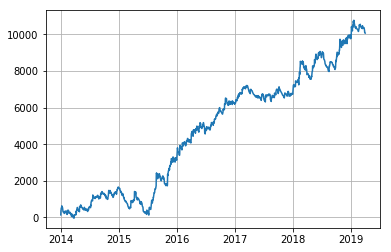

In [74]:
plt.plot(R1.Date,R1.Diff.cumsum())
plt.grid()

OK


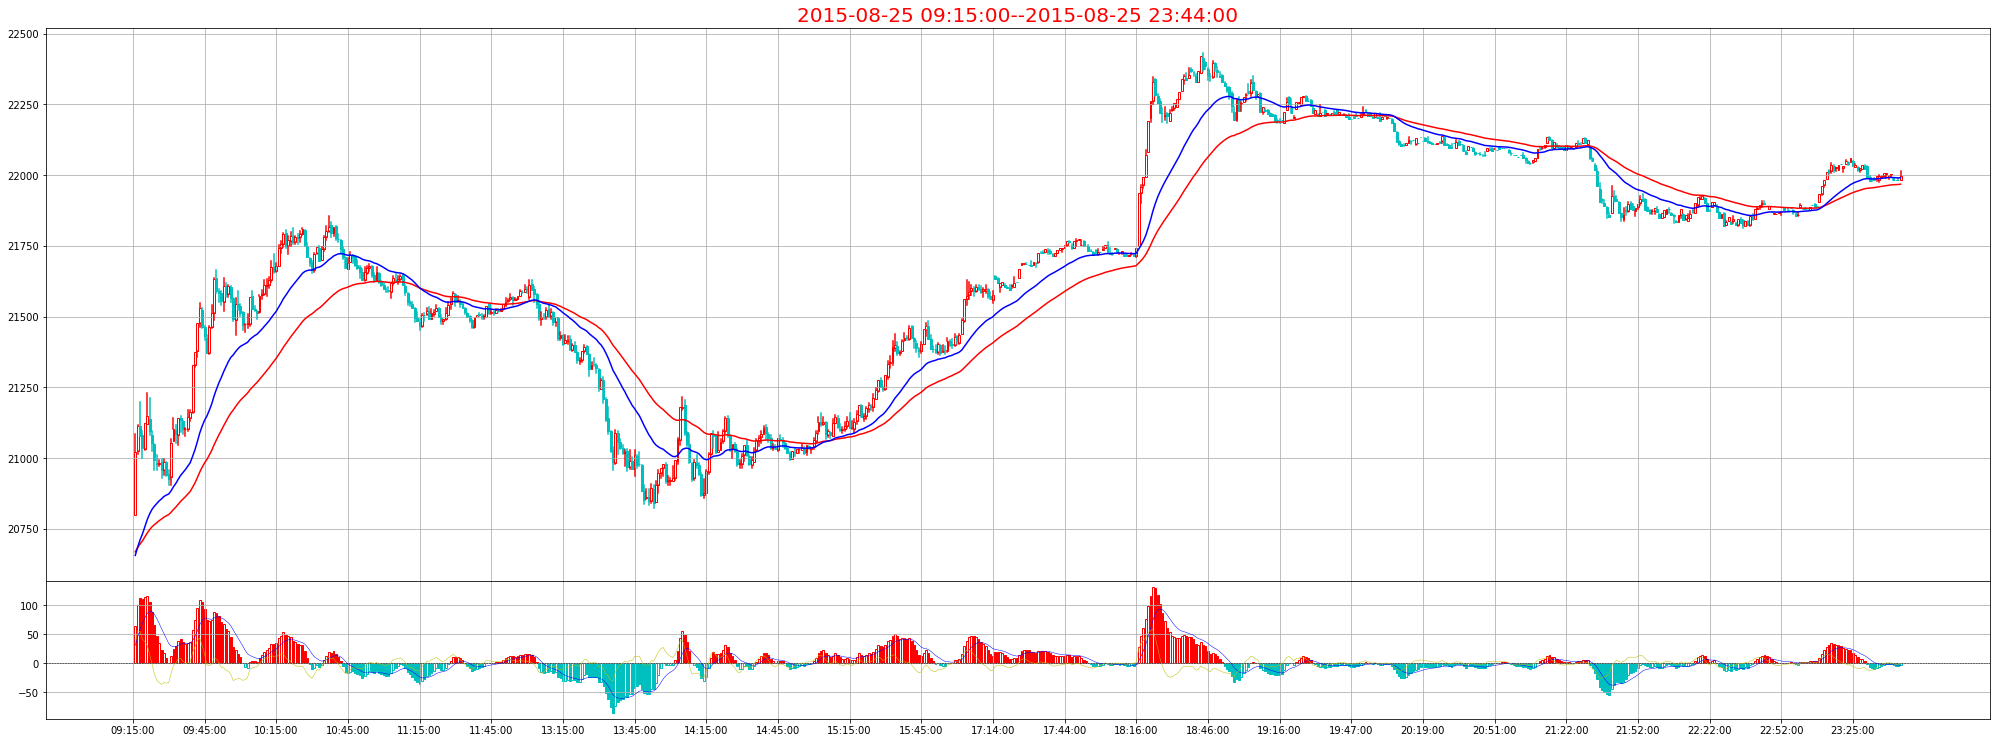

In [68]:
from kline import Kline as KK
K1=KK()
date='2015-08-25'
dd=df1[date]
K1.DrawKline(dd)

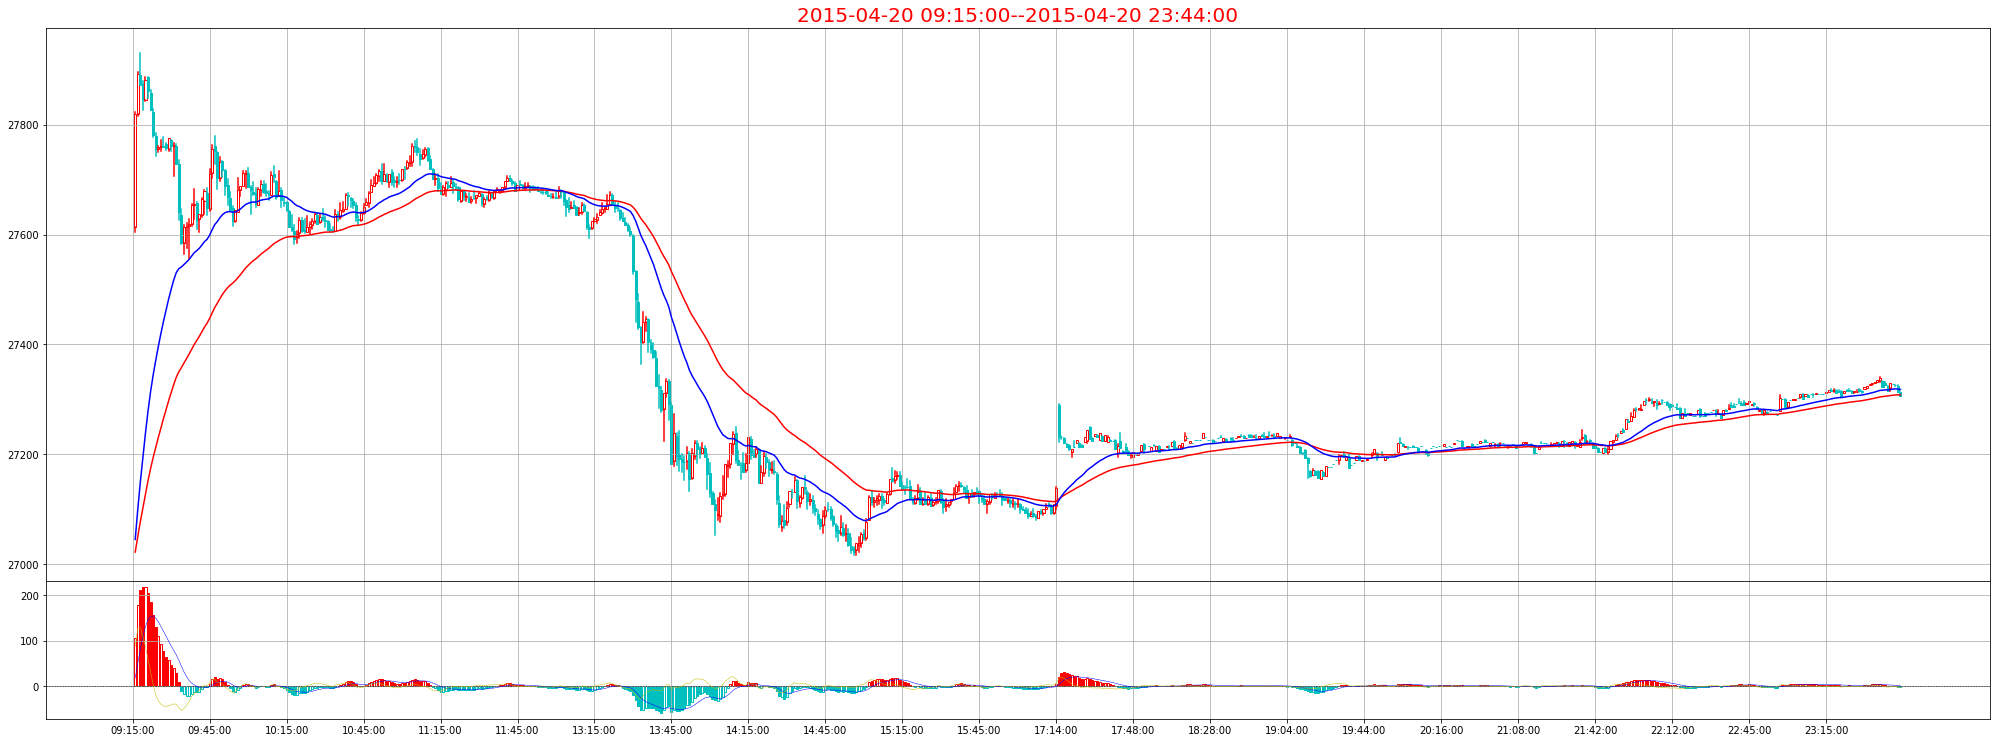

In [12]:
date='2015/4/20'
dd=df1[date]
K1.DrawKline(dd)

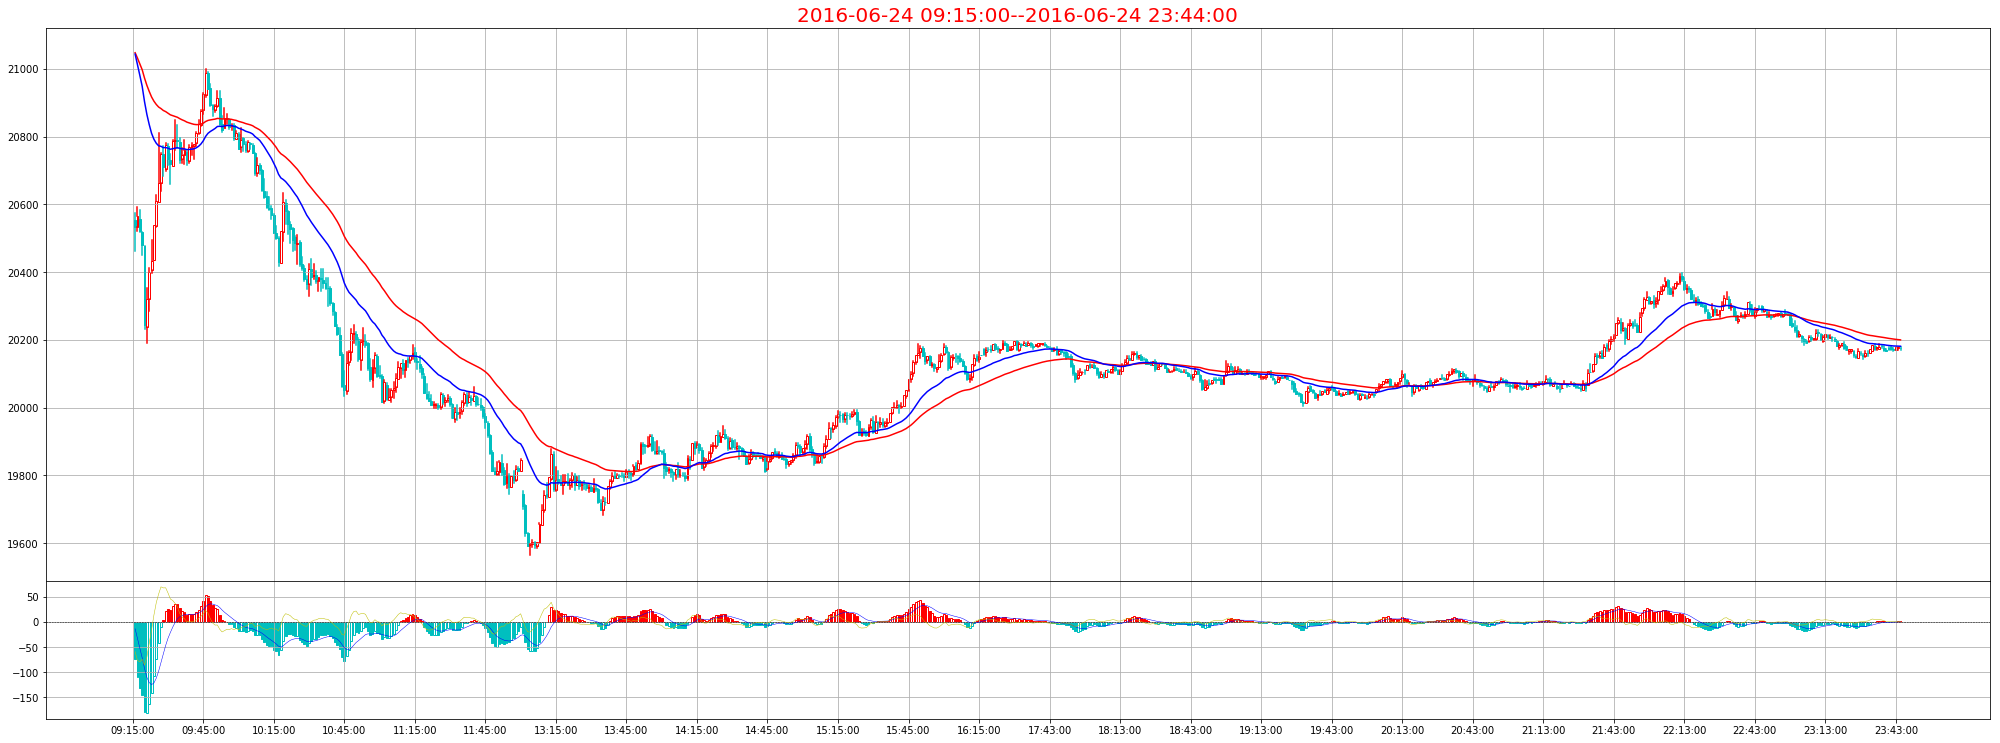

In [70]:
date='2016-06-24'
dd=df1[date]
K1.DrawKline(dd)

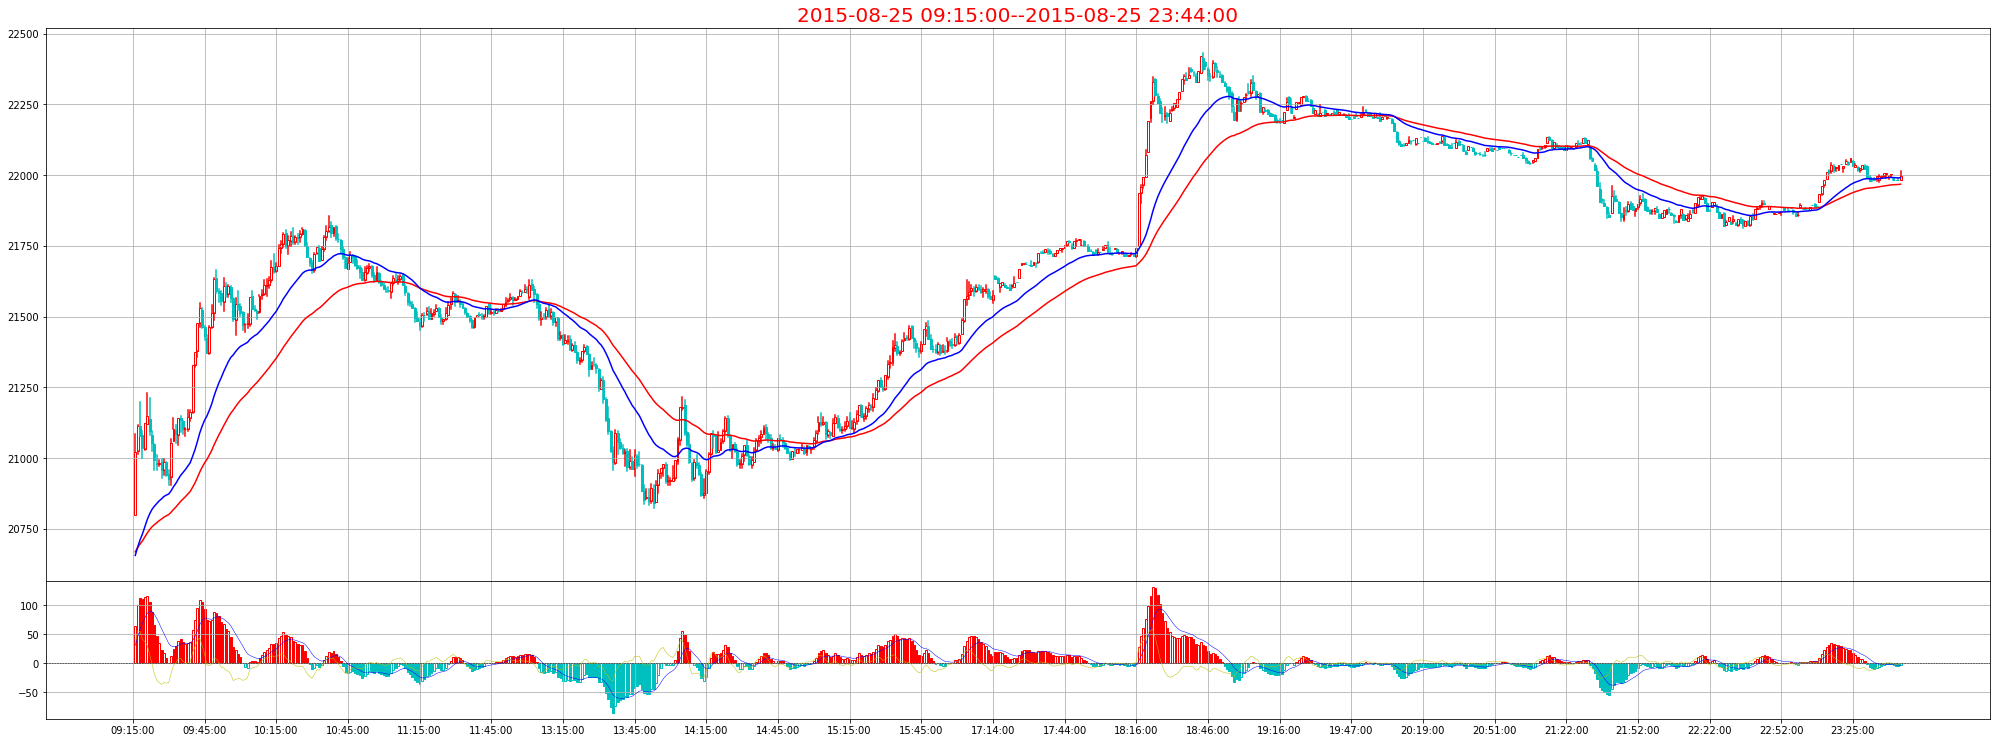

In [18]:
date='2015/8/25'
dd=df1[date]
K1.DrawKline(dd)